In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
combined=pd.concat([train, test], axis=0, ignore_index=True)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
combined.shape

(1309, 12)

In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [11]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [15]:
combined.corr(numeric_only=True).T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


## Feature Engineering

In [4]:
# Name
courtesy_title=[]
for i in combined.Name:
    courtesy_title.append(i.split(',')[1].split('.')[0].strip())

In [17]:
pd.Series(courtesy_title).value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [5]:
combined['Title']=courtesy_title

In [6]:
# Cabin 
combined['Cabin_Allocated']=combined['Cabin'].apply(lambda x: 1 if x in combined.Cabin.unique()[1:] else 0)

In [7]:
combined.Cabin_Allocated.value_counts()

Cabin_Allocated
0    1014
1     295
Name: count, dtype: int64

In [8]:
# SibSp and #Parch
combined['Family']=combined['SibSp']+combined['Parch']+1

In [9]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Allocated,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2


### Missing Value Treatment

In [10]:
combined.isnull().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                 263
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin              1014
Embarked              2
Title                 0
Cabin_Allocated       0
Family                0
dtype: int64

In [11]:
# Age
combined.groupby('Title')['Age'].median()

Title
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           4.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              29.0
Mrs             35.5
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [12]:
combined['Age']=combined.groupby('Title')['Age'].transform(lambda x:x.fillna(x.median()))

In [13]:
# Fare
combined.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [14]:
combined['Fare'].fillna(8.0500, inplace=True)

In [15]:
combined.isnull().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              2
Title                 0
Cabin_Allocated       0
Family                0
dtype: int64

In [32]:
# Embarked
combined.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [16]:
combined['Embarked'].fillna('S', inplace=True)

In [17]:
combined.Embarked.value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [18]:
combined.isnull().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
Title                 0
Cabin_Allocated       0
Family                0
dtype: int64

### Feature Engineering/Transformation (After Treating Missing values)


In [19]:
#Age
def age_bracket(number):
    if number <=12:
        return 'Kids'
    elif number <=30:
        return 'Youth'
    elif number<=60:
        return 'Mid-senior'
    else:
        return 'Senior'
combined['Age_Bracket']=combined.Age.apply(age_bracket)

In [20]:
combined['Age_Bracket'].value_counts()

Age_Bracket
Youth         742
Mid-senior    432
Kids          102
Senior         33
Name: count, dtype: int64

In [23]:
# Feature Engineering of Family
def family_size(num):
    if num==1:
        return 'Single'
    elif num==2:
        return 'Couple'
    elif num>2 and num<7:
        return 'Small_Family'
    else: 
        return 'Large_Family'

In [24]:
combined['Family_Size']=combined.Family.apply(family_size)

### Let's drop the unnecessary columns

In [25]:
combined_clean=combined.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title'])

### Visualization

In [26]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Cabin_Allocated', 'Family', 'Age_Bracket', 'Family_Size'],
      dtype='object')

In [27]:
combined_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Cabin_Allocated', 'Family', 'Age_Bracket', 'Family_Size'],
      dtype='object')

<Axes: ylabel='Pclass'>

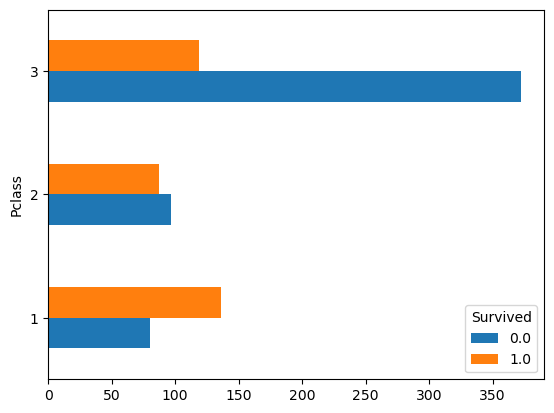

In [46]:
# Pclass
pd.crosstab(index=combined_clean['Pclass'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: ylabel='Sex'>

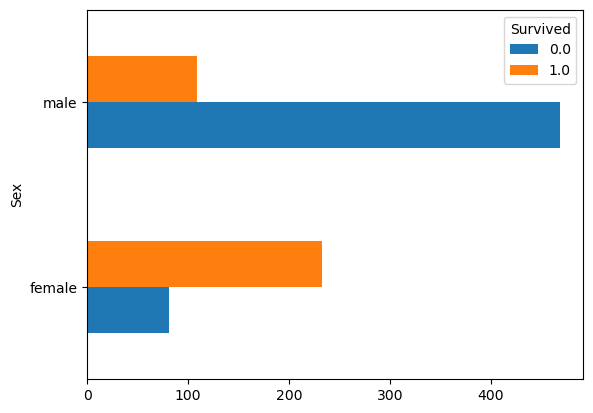

In [47]:
# Sex
pd.crosstab(index=combined_clean['Sex'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: xlabel='Survived', ylabel='Age'>

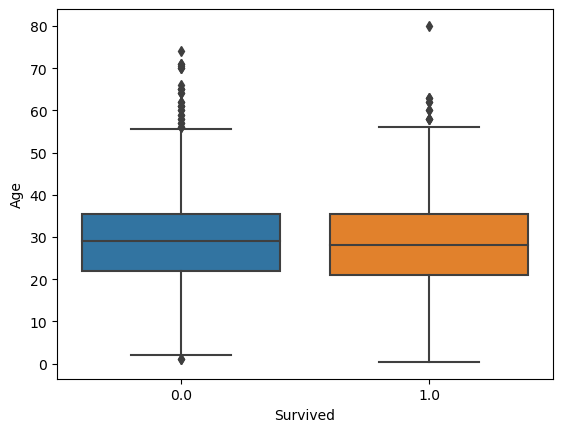

In [48]:
#Age
sns.boxplot(data=combined_clean, x='Survived', y='Age')

<Axes: xlabel='Survived', ylabel='Fare'>

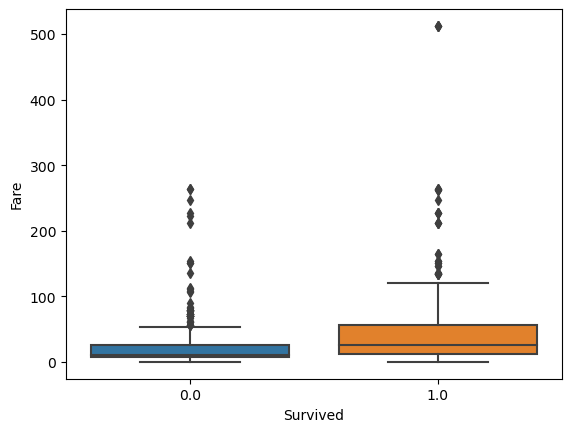

In [49]:
#Fare
sns.boxplot(data=combined_clean, x='Survived', y='Fare')

<Axes: ylabel='Embarked'>

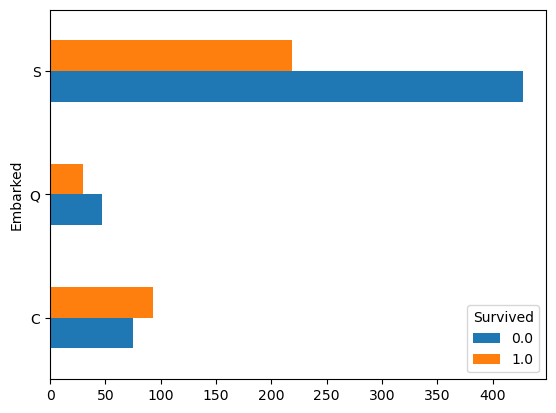

In [50]:
# Embarked
pd.crosstab(index=combined_clean['Embarked'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: ylabel='Cabin_Allocated'>

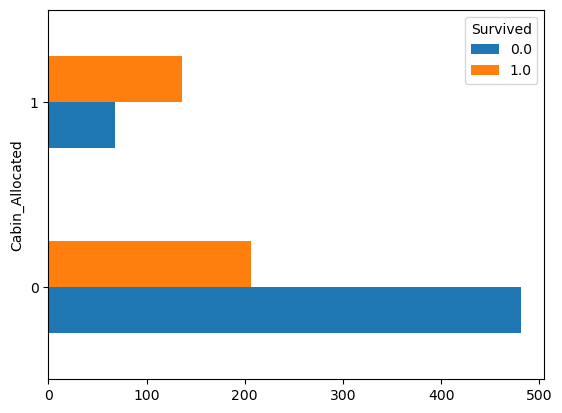

In [51]:
# Cabin_Allocated
pd.crosstab(index=combined_clean['Cabin_Allocated'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: ylabel='Family'>

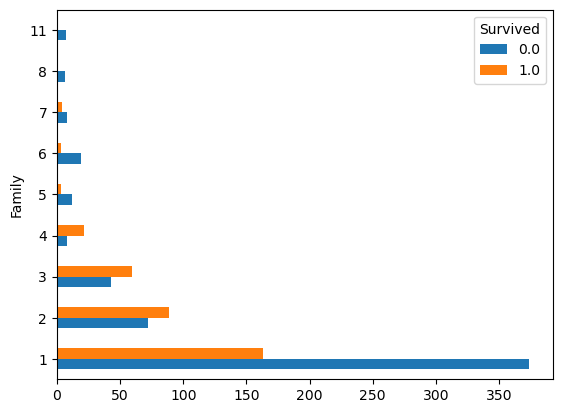

In [52]:
# Family
pd.crosstab(index=combined_clean['Family'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: ylabel='Family_Size'>

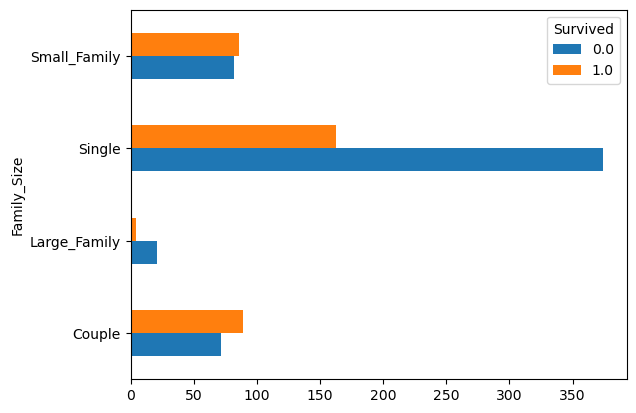

In [57]:
# Family_size
pd.crosstab(index=combined_clean['Family_Size'], columns=combined_clean['Survived']).plot(kind='barh')

<Axes: ylabel='Age_Bracket'>

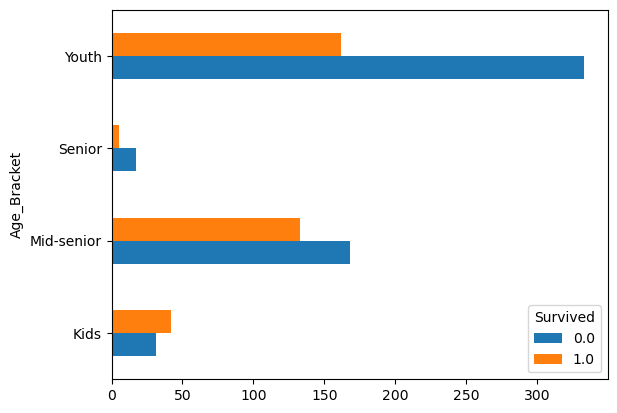

In [70]:
# Age_Bracket
pd.crosstab(index=combined_clean['Age_Bracket'], columns=combined_clean['Survived']).plot(kind='barh')

In [60]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Allocated,Family,Age_Bracket,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2,Youth,Couple
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2,Mid-senior,Couple


In [35]:
combined_clean.drop(['Age', 'Family'], axis=1, inplace=True)

In [36]:
combined_clean.isnull().sum()

Survived           418
Pclass               0
Sex                  0
Fare                 0
Embarked             0
Cabin_Allocated      0
Age_Bracket          0
Family_Size          0
dtype: int64

In [37]:
combined_clean.head()

,Survived,Pclass,Sex,Fare,Embarked,Cabin_Allocated,Age_Bracket,Family_Size
0,0.0,3,male,7.2500,S,0,Youth,Couple
1,1.0,1,female,71.2833,C,1,Mid-senior,Couple
2,1.0,3,female,7.9250,S,0,Youth,Single
3,1.0,1,female,53.1000,S,1,Mid-senior,Couple
4,0.0,3,male,8.0500,S,0,Mid-senior,Single


In [38]:
combined_clean.shape

(1309, 8)

### Encoding

In [39]:
dummy=pd.get_dummies(combined_clean, drop_first=True, dtype=int)
dummy.shape

(1309, 13)

In [40]:
combined_train=dummy.loc[0:train.shape[0]-1, :]
combined_test=dummy.loc[train.shape[0]:, :]

In [41]:
combined_train

,Survived,Pclass,Fare,Cabin_Allocated,Sex_male,Embarked_Q,Embarked_S,Age_Bracket_Mid-senior,Age_Bracket_Senior,Age_Bracket_Youth,Family_Size_Large_Family,Family_Size_Single,Family_Size_Small_Family
0,0.0,3,7.2500,0,1,0,1,0,0,1,0,0,0
1,1.0,1,71.2833,1,0,0,0,1,0,0,0,0,0
2,1.0,3,7.9250,0,0,0,1,0,0,1,0,1,0
3,1.0,1,53.1000,1,0,0,1,1,0,0,0,0,0
4,0.0,3,8.0500,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,13.0000,0,1,0,1,0,0,1,0,1,0
887,1.0,1,30.0000,1,0,0,1,0,0,1,0,1,0
888,0.0,3,23.4500,0,0,0,1,0,0,1,0,0,1
889,1.0,1,30.0000,1,1,0,0,0,0,1,0,1,0


In [42]:
combined_train['Survived']=combined_train.Survived.astype(int)

In [43]:
combined_train.head()

,Survived,Pclass,Fare,Cabin_Allocated,Sex_male,Embarked_Q,Embarked_S,Age_Bracket_Mid-senior,Age_Bracket_Senior,Age_Bracket_Youth,Family_Size_Large_Family,Family_Size_Single,Family_Size_Small_Family
0,0,3,7.2500,0,1,0,1,0,0,1,0,0,0
1,1,1,71.2833,1,0,0,0,1,0,0,0,0,0
2,1,3,7.9250,0,0,0,1,0,0,1,0,1,0
3,1,1,53.1000,1,0,0,1,1,0,0,0,0,0
4,0,3,8.0500,0,1,0,1,1,0,0,0,1,0


In [44]:
combined_test.drop(columns='Survived', inplace=True)

In [45]:
combined_test

,Pclass,Fare,Cabin_Allocated,Sex_male,Embarked_Q,Embarked_S,Age_Bracket_Mid-senior,Age_Bracket_Senior,Age_Bracket_Youth,Family_Size_Large_Family,Family_Size_Single,Family_Size_Small_Family
891,3,7.8292,0,1,1,0,1,0,0,0,1,0
892,3,7.0000,0,0,0,1,1,0,0,0,0,0
893,2,9.6875,0,1,1,0,0,1,0,0,1,0
894,3,8.6625,0,1,0,1,0,0,1,0,1,0
895,3,12.2875,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,8.0500,0,1,0,1,0,0,1,0,1,0
1305,1,108.9000,1,0,0,0,1,0,0,0,1,0
1306,3,7.2500,0,1,0,1,1,0,0,0,1,0
1307,3,8.0500,0,1,0,1,0,0,1,0,1,0


In [46]:
PassengerId=test.PassengerId.values

## Model Building and Evaluation

In [47]:
# Libraries for Model Selection 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

#Libraries for Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
#Libraries for Evaluating the performances
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix , f1_score

In [48]:
x=combined_train.drop(columns=['Survived'])
y=combined_train['Survived']

In [49]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, stratify=y)

In [50]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((623, 12), (623,), (268, 12), (268,))

### Logistic Regression

In [121]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
accuracy=[]
roc_auc=[]
f1Score=[]
for train_index, test_index in kfold.split(xtrain, ytrain):
    model=LogisticRegression()
    model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    pred=model.predict(combined_test)
    accuracy.append(accuracy_score(pred, ytrain.iloc[test_index]))
    roc_auc.append(roc_auc_score(pred, ytrain.iloc[test_index]))
    f1Score.append(f1_score(pred, ytrain.iloc[test_index]))


predict=model.predict(xtest)
print('accuracy', accuracy_score(ytest, predict))
print('RocAuc', roc_auc_score(ytest,predict))
print('F1Score', f1_score(ytest, predict))
accuracy, roc_auc, f1Score

accuracy 0.8171641791044776
RocAuc 0.8077375698734923
F1Score 0.7632850241545893


([0.8125, 0.8028846153846154, 0.782608695652174],
 [0.802964211361158, 0.7935338345864662, 0.7696585365853659],
 [0.7515923566878983, 0.7354838709677418, 0.7204968944099378])

In [122]:
final_prediction=model.predict(combined_test.drop(columns='Age'))
final_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [128]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_prediction})

In [129]:
submission.to_csv('Titanic_LogReg.csv')

### NaiveBayes

In [130]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
accuracy=[]
roc_auc=[]
f1Score=[]
for train_index, test_index in kfold.split(xtrain, ytrain):
    model=GaussianNB()
    model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    pred=model.predict(xtrain.iloc[test_index])
    accuracy.append(accuracy_score(pred, ytrain.iloc[test_index]))
    roc_auc.append(roc_auc_score(pred, ytrain.iloc[test_index]))
    f1Score.append(f1_score(pred, ytrain.iloc[test_index]))


predict=model.predict(xtest)
print('accuracy', accuracy_score(ytest, predict))
print('RocAuc', roc_auc_score(ytest,predict))
print('F1Score', f1_score(ytest, predict))
accuracy, roc_auc, f1Score

accuracy 0.7835820895522388
RocAuc 0.7877611062077081
F1Score 0.7410714285714286


([0.7932692307692307, 0.7355769230769231, 0.7246376811594203],
 [0.7832722832722834, 0.7235860636389387, 0.7081097197376267],
 [0.7485380116959066, 0.6745562130177516, 0.6369426751592356])

In [131]:
final_prediction=model.predict(combined_test.drop(columns='Age'))
final_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [132]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_prediction})

In [133]:
submission.to_csv('Titanic_Naive_Bayes.csv')

### Decision Tree

In [169]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
accuracy=[]
roc_auc=[]
f1Score=[]
for train_index, test_index in kfold.split(xtrain, ytrain):
    model=DecisionTreeClassifier(max_depth=3)
    model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    pred=model.predict(xtrain.iloc[test_index])
    accuracy.append(accuracy_score(pred, ytrain.iloc[test_index]))
    roc_auc.append(roc_auc_score(pred, ytrain.iloc[test_index]))
    f1Score.append(f1_score(pred, ytrain.iloc[test_index]))


predict=model.predict(xtest)
print('accuracy', accuracy_score(ytest, predict))
print('RocAuc', roc_auc_score(ytest,predict))
print('F1Score', f1_score(ytest, predict))
accuracy, roc_auc, f1Score

accuracy 0.8208955223880597
RocAuc 0.8016475433951162
F1Score 0.7551020408163266


([0.7692307692307693, 0.7932692307692307, 0.7681159420289855],
 [0.782051282051282, 0.7831077694235589, 0.7544955044955045],
 [0.6363636363636364, 0.7225806451612902, 0.6923076923076923])

In [170]:
final_prediction=model.predict(combined_test.drop(columns='Age'))
final_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [171]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_prediction})

In [172]:
submission.to_csv('Titanic_Decision_Tree.csv')

## Random Forest

In [181]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
accuracy=[]
roc_auc=[]
f1Score=[]
for train_index, test_index in kfold.split(xtrain, ytrain):
    model=RandomForestClassifier(max_depth=3)
    model.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    pred=model.predict(xtrain.iloc[test_index])
    accuracy.append(accuracy_score(pred, ytrain.iloc[test_index]))
    roc_auc.append(roc_auc_score(pred, ytrain.iloc[test_index]))
    f1Score.append(f1_score(pred, ytrain.iloc[test_index]))


predict=model.predict(xtest)
print('accuracy', accuracy_score(ytest, predict))
print('RocAuc', roc_auc_score(ytest,predict))
print('F1Score', f1_score(ytest, predict))
accuracy, roc_auc, f1Score

accuracy 0.8134328358208955
RocAuc 0.7773462783171521
F1Score 0.7191011235955056


([0.8461538461538461, 0.7644230769230769, 0.7439613526570048],
 [0.8431372549019608, 0.7699940582293523, 0.7494267515923567],
 [0.7894736842105262, 0.6370370370370371, 0.5891472868217054])

In [182]:
final_prediction=model.predict(combined_test.drop(columns='Age'))
final_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [183]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_prediction})

In [184]:
submission.to_csv('Titanic_Random_Forest.csv')

In [51]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
predictions=[]
for train_index, test_index in kfold.split(x, y):
    model=LogisticRegression()
    model.fit(x.iloc[train_index], y.iloc[train_index])
    pred=model.predict(combined_test)
    predictions.append(pred)
    


In [59]:
df=pd.DataFrame(predictions).T
df['Final_Pred']=df.mode(axis=1)

In [61]:
final_submission=df['Final_Pred']

In [64]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_submission})

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
submission.to_csv('Titanic_LogisticRegression_CV.csv', index=False)

In [66]:
kfold=StratifiedKFold(n_splits=3, shuffle=True)
predictions=[]
for train_index, test_index in kfold.split(x, y):
    model=GradientBoostingClassifier()
    model.fit(x.iloc[train_index], y.iloc[train_index])
    pred=model.predict(combined_test)
    predictions.append(pred)
    


In [67]:
predictions

[array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [68]:
df=pd.DataFrame(predictions).T
df['Final_Pred']=df.mode(axis=1)

In [69]:
df

,0,1,2,Final_Pred
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
413,0,0,0,0
414,1,1,1,1
415,0,0,0,0
416,0,0,0,0


In [70]:
submission=pd.DataFrame({'PassengerId':PassengerId, 'Survived':final_submission})

In [71]:
submission.to_csv('Titanic_GradientBoosting_CV.csv', index=False)